In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO

In these experiments, neural activity was recorded using both electroencephalography (EEG) arrays and Neuropixels probes during direct electrical stimulation of the cortex in awake and anesthetized head-fixed mice. Initially, recordings were made while the mice were awake and free to move on a rotating disc. Following a series of stimuli, the mice were anesthetized with isoflurane and maintained at a surgical level of unconsciousness for further stimulus delivery. In some cases, after the isoflurane was turned off, an additional series of stimuli was delivered during a recovery phase. The data collected from each session includes raw EEG and LFP signals, spike times, the subject's movement speed, and detailed information about the stimulus trials and anesthesia epochs.

The recorded data provide insights into the brain's response to stimuli under different states of consciousness (awake, anesthetized, and recovering). While all sessions involved awake and isoflurane epochs, not all included a recovery phase. Some sessions also involved visual stimulation trials presented in the subject's right field of view alongside the electrical stimulation. The dataset contains extensive information about the recorded neural signals, the conditions under which they were collected, and the specific parameters of the stimuli, making it a valuable resource for studying the effects of anesthesia and electrical stimulation on brain activity.

In [2]:
url = "https://api.dandiarchive.org/api/assets/6ab37be4-adfe-4bea-a031-eb1a2b0782a8/download/"

In [3]:
# from dandi.download import download

# download(url, ".")

PATH                                         SIZE      DONE    DONE% CHECKSUM STATUS  MESSAGE          
sub-521885_ses-20200709_behavior+ecephys.nwb                                  error   FileExistsError  
Summary:                                     0 Bytes   0 Bytes                1 error 1 FileExistsError
                                             +312.1 MB 0.00%                                           


In [4]:
filepath = 'sub-521885_ses-20200709_behavior+ecephys.nwb'

In [5]:
io = NWBHDF5IO(filepath, mode="r")
nwbfile = io.read()
nwbfile

c:\Users\sangeetha\anaconda3\envs\dexplore\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
c:\Users\sangeetha\anaconda3\envs\dexplore\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
c:\Users\sangeetha\anaconda3\envs\dexplore\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


,location,group,group_name,is_data_valid,probe_vertical_position,probe_horizontal_position,x,y,z,reference
id,,,,,,,,,,
0,VISl,"EEG array pynwb.ecephys.ElectrodeGroup at 0x3068035381392\nFields:\n description: 30-ch surface grid\n device: EEG array pynwb.device.Device at 0x3068033496512\nFields:\n description: H32 Mouse EEG (30-ch)\n manufacturer: Neuronexus\n\n location: skull surface, both hemispheres\n",EEG array,True,-1,-1,377.0,58.0,82.0,"built-in surface electrode, left CB"
1,VISp,"EEG array pynwb.ecephys.ElectrodeGroup at 0x3068035381392\nFields:\n description: 30-ch surface grid\n device: EEG array pynwb.device.Device at 0x3068033496512\nFields:\n description: H32 Mouse EEG (30-ch)\n manufacturer: Neuronexus\n\n location: skull surface, both hemispheres\n",EEG array,True,-1,-1,377.0,24.0,141.0,"built-in surface electrode, left CB"
2,RSPagl,"EEG array pynwb.ecephys.ElectrodeGroup at 0x3068035381392\nFields:\n description: 30-ch surface grid\n device: EEG array pynwb.device.Device at 0x3068033496512\nFields:\n description: H32 Mouse EEG (30-ch)\n manufacturer: Neuronexus\n\n location: skull surface, both hemispheres\n",EEG array,True,-1,-1,377.0,20.0,188.0,"built-in surface electrode, left CB"
3,VISal,"EEG array pynwb.ecephys.ElectrodeGroup at 0x3068035381392\nFields:\n description: 30-ch surface grid\n device: EEG array pynwb.device.Device at 0x3068033496512\nFields:\n description: H32 Mouse EEG (30-ch)\n manufacturer: Neuronexus\n\n location: skull surface, both hemispheres\n",EEG array,True,-1,-1,333.0,47.0,79.0,"built-in surface electrode, left CB"
,location,group,group_name,is_data_valid,probe_vertical_position,probe_horizontal_position,x,y,z,reference
id,,,,,,,,,,
0,VISl,"EEG array pynwb.ecephys.ElectrodeGroup at 0x3068035381392\nFields:\n description: 30-ch surface grid\n device: EEG array pynwb.device.Device at 0x3068033496512\nFields:\n description: H32 Mouse EEG (30-ch)\n manufacturer: Neuronexus\n\n location: skull surface, both hemispheres\n",EEG array,True,-1,-1,377.0,58.0,82.0,"built-in surface electrode, left CB"
1,VISp,"EEG array pynwb.ecephys.ElectrodeGroup at 0x3068035381392\nFields:\n description: 30-ch surface grid\n device: EEG array pynwb.device.Device at 0x3068033496512\nFields:\n description: H32 Mouse EEG (30-ch)\n manufacturer: Neuronexus\n\n location: skull surface, both hemispheres\n",EEG array,True,-1,-1,377.0,24.0,141.0,"built-in surface electrode, left CB"
2,RSPagl,"EEG array pynwb.ecephys.ElectrodeGroup at 0x3068035381392\nFields:\n description: 30-ch surface grid\n device: EEG array pynwb.device.Device at 0x3068033496512\nFields:\n description: H32 Mouse EEG (30-ch)\n manufacturer: Neuronexus\n\n location: skull surface, both hemispheres\n",EEG array,True,-1,-1,377.0,20.0,188.0,"built-in surface electrode, left CB"


Electrode co-ordinates

In [6]:
data = nwbfile.acquisition['ElectricalSeriesEEG'].electrodes[:].reset_index()

In [7]:
x = data['x'].values
y = data['y'].values
z = data['z'].values

Plotting with matplotlib

Text(0.5, 0, 'Z')

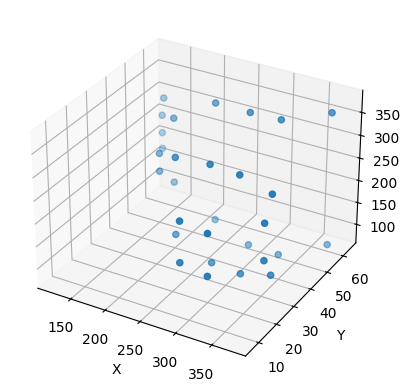

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') 

# This is horrible!